# ___Cost Functions___
--------------

In [ ]:
# cost functions are used to estimate model performance
# like how well our model is doing? (how close are our model's predictions to the actual targets)

In [1]:
import numpy as np
from numpy.typing import NDArray
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
beans = pd.read_csv(r"../anoban/Dry_Bean_Dataset.csv")
beans.shape

(13611, 17)

In [3]:
# let's try and predict bean surface area, given the bean length

feature = beans.MajorAxisLength
target = beans.Area

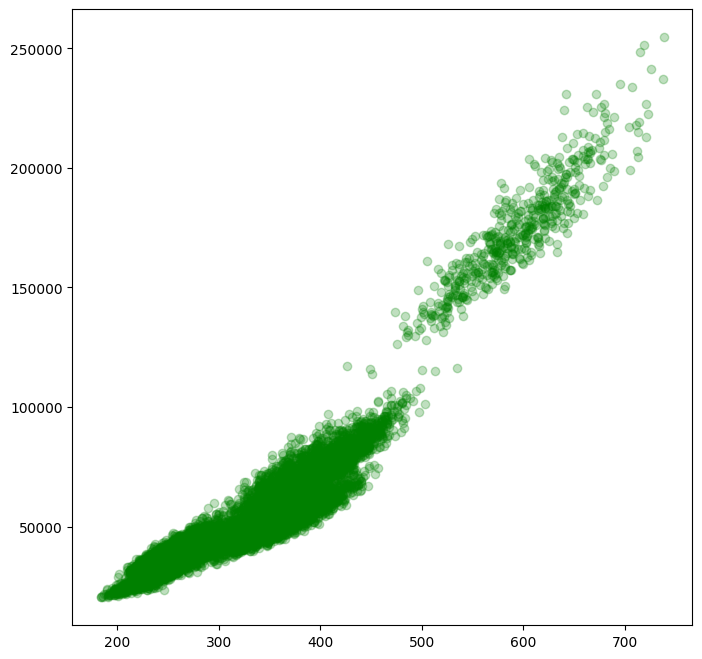

In [4]:
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.scatter(feature, target, color = "green", alpha = 0.25)
plt.show()

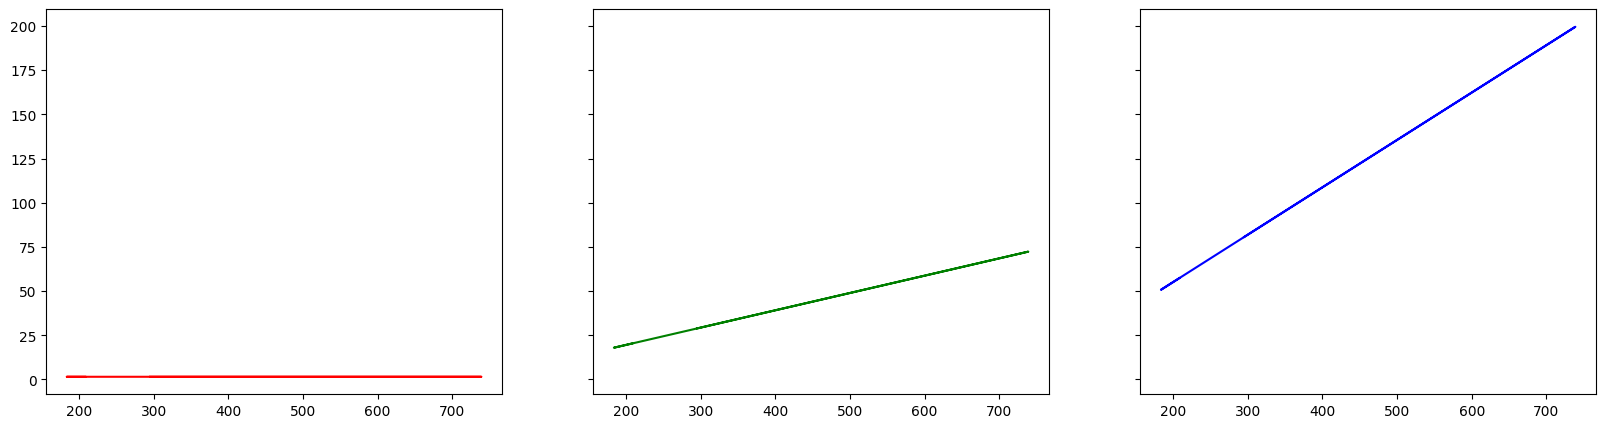

In [5]:
# let's consider y = mx + b style linear equations

fig, (axes_0, axes_1, axes_2) = plt.subplots(ncols = 3, nrows = 1, sharex = True, sharey = True)
fig.set_size_inches(20, 5)

axes_0.plot(feature, feature * 0.0 + 1.53546263, color = "red")  # y = 0.0 x + 1.53546263
axes_1.plot(feature, feature * 0.09789 + 0.000000, color = "green")  # y = 0.09789 x + 0
axes_2.plot(feature, feature * 0.267960 + 1.53546263, color = "blue")  # y = 0.267960 x + 1.53546263

plt.show()

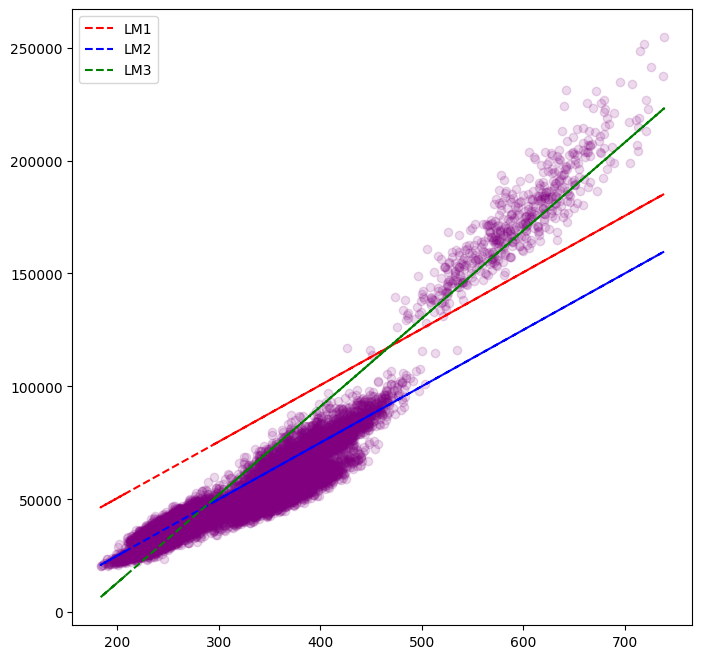

In [6]:
# we have a training set that looks like this, and we have a few linear models to estimate their fitness

fig, axes = plt.subplots()
fig.set_size_inches(8, 8)
axes.scatter(feature, target, color = "purple", alpha = 0.15)

plt.plot(feature, feature * 250 + 500, color = "red", label = "LM1", linestyle="--")
plt.plot(feature, feature * 250 - 25_000, color = "blue", label = "LM2", linestyle="--")
plt.plot(feature, feature * 390 - 65_000, color = "green", label = "LM3", linestyle="--")

plt.legend()
plt.show()

In [7]:
# the bottom line here is that the algorithm needs to evaluate the values for m and b as best as possible such that the predictions for most if not all
# records are as close as possible to the true target values in the training set.

# least squares regression
# first the algorith bootstraps itself with some default values for m and b and then computes the estimates for the target.
# then it evaluates how far off these predictions were from the true targets.
# this is done using the mean squared errors

# $e = \hat{y} - y$
# $e^{2} = (\hat{y} - y)^{2}$

In [8]:
# mean of squared errors is as follows, where i points to each row in the dataset (each element of the true target and the predictions)

# $=\frac{1}{m}\sum_{i=0}^{m} (\hat{y_i} - y_i)^{2}$

In [9]:
# by convention, the cost function used in ML spheres divides the seqaured errors by (2 * number of rows) not by thenumber of rows.
# then it isn't mean squared errors anymore.

# $=\frac{1}{2m}\sum_{i=0}^{m} (\hat{y_i} - y_i)^{2}$

In [10]:
# now, we could rewrite the cost function as, where f(x) represents our linear regression model
# f(x) = mx + b

# $=\frac{1}{2m}\sum_{i=0}^{m} (f({x_i}) - y_i)^{2}$